# Control Specification (And)

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `CtrlSpecAnd`
Computes a single qubit which is `1` iff the CtrlSpec of And clauses is satisfied.

This reduces an arbitrary 'And' clause control spec to a single qubit, which can be used
to then control a bloq. Therefore, a bloq author is only required to implement a
single-controlled version of their bloq, and can be generalized to arbitrary controls.

The control registers are passed through as-is. If the same control bit is required for
multiple bloqs, the user can use the `target` qubit of this bloq multiple times, and only
uncompute at the very end. For more custom strategies and trade-offs, see Ref. [1].

.. note::

   This only applies to CtrlSpec being a logical AND of all registers, and each register
   being equal to a constant. See documentation for :class:`CtrlSpec` for more details.

#### Parameters
 - `ctrl_spec`: The control specification. 

#### Registers
 - `ctrl_i`: The control register for the i-th ctrl dtype in the `ctrl_spec`.
 - `junk [right]`: `ctrl_spec.num_qubits - 2` qubits that can be cleaned up by the inverse. Only present if the above size is non-zero.
 - `target [right]`: The output bit storing the result of the `ctrl_spec`. 

#### References
 - [Unqomp: synthesizing uncomputation in Quantum circuits](https://dl.acm.org/doi/10.1145/3453483.3454040). Paradis et. al. 2021.


In [2]:
from qualtran.bloqs.mcmt import CtrlSpecAnd

### Example Instances

In [3]:
from qualtran import CtrlSpec, QUInt

ctrl_on_int = CtrlSpecAnd(CtrlSpec(qdtypes=QUInt(4), cvs=[0b0101]))

In [4]:
from qualtran import CtrlSpec, QBit

ctrl_on_bits = CtrlSpecAnd(CtrlSpec(qdtypes=QBit(), cvs=[0, 1, 0, 1]))

In [5]:
import numpy as np

from qualtran import CtrlSpec, QBit

ctrl_on_nd_bits = CtrlSpecAnd(CtrlSpec(qdtypes=QBit(), cvs=np.array([[0, 1], [1, 0]])))

In [6]:
from qualtran import CtrlSpec, QInt, QUInt

ctrl_on_multiple_values = CtrlSpecAnd(
    CtrlSpec(qdtypes=(QUInt(4), QInt(4)), cvs=([0b0101, 0b1100], [2, -2]))
)

#### Graphical Signature

In [7]:
from qualtran.drawing import show_bloqs
show_bloqs([ctrl_on_int, ctrl_on_bits, ctrl_on_nd_bits, ctrl_on_multiple_values],
           ['`ctrl_on_int`', '`ctrl_on_bits`', '`ctrl_on_nd_bits`', '`ctrl_on_multiple_values`'])

### Call Graph

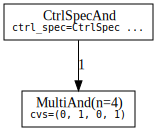

#### Counts totals:
 - `MultiAnd(n=4)`: 1

In [8]:
from qualtran.resource_counting.generalizers import ignore_split_join
ctrl_on_int_g, ctrl_on_int_sigma = ctrl_on_int.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(ctrl_on_int_g)
show_counts_sigma(ctrl_on_int_sigma)